In [2]:
import pandas as pd
df = pd.read_csv('/kaggle/input/d/blastchar/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


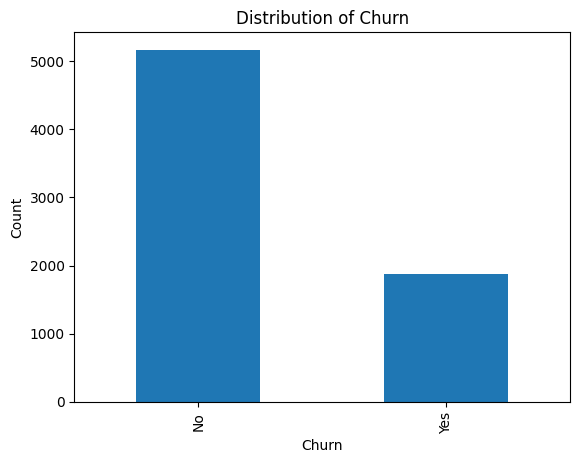

In [4]:
import matplotlib.pyplot as plt
df['Churn'].value_counts().plot(kind='bar')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Distribution of Churn')
plt.show()

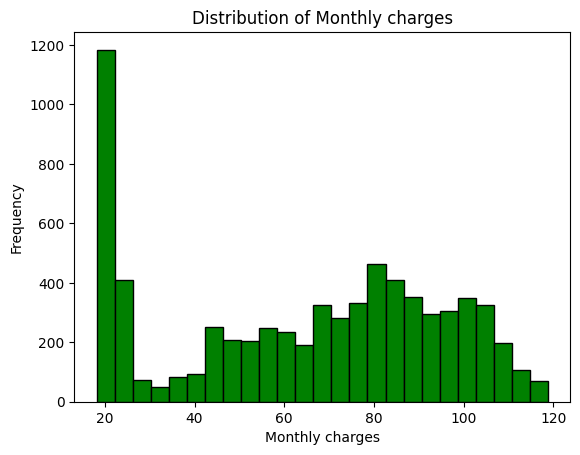

In [5]:
plt.hist(df['MonthlyCharges'],bins=25,color='green',edgecolor='black')
plt.xlabel('Monthly charges')
plt.ylabel('Frequency')
plt.title('Distribution of Monthly charges')
plt.show()


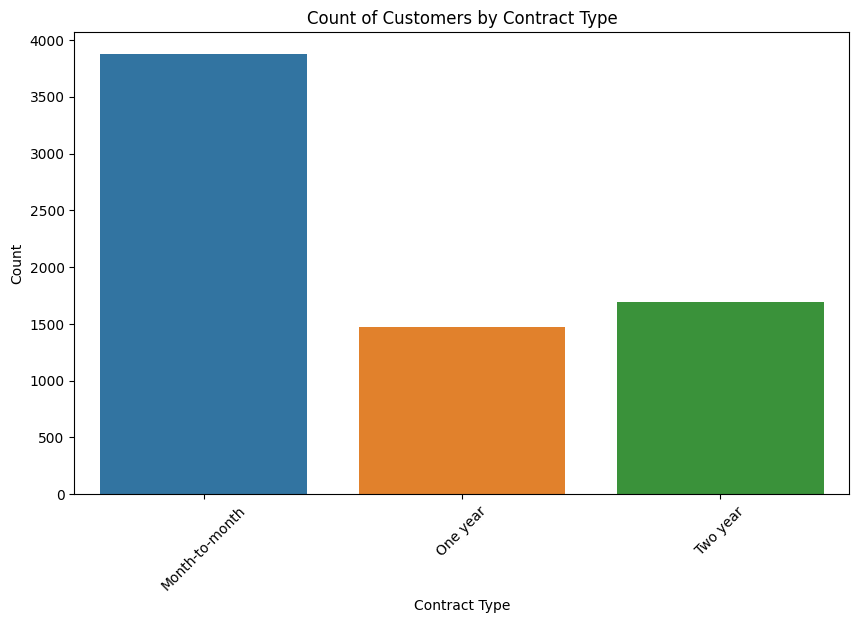

In [6]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', data=df)
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.title('Count of Customers by Contract Type')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


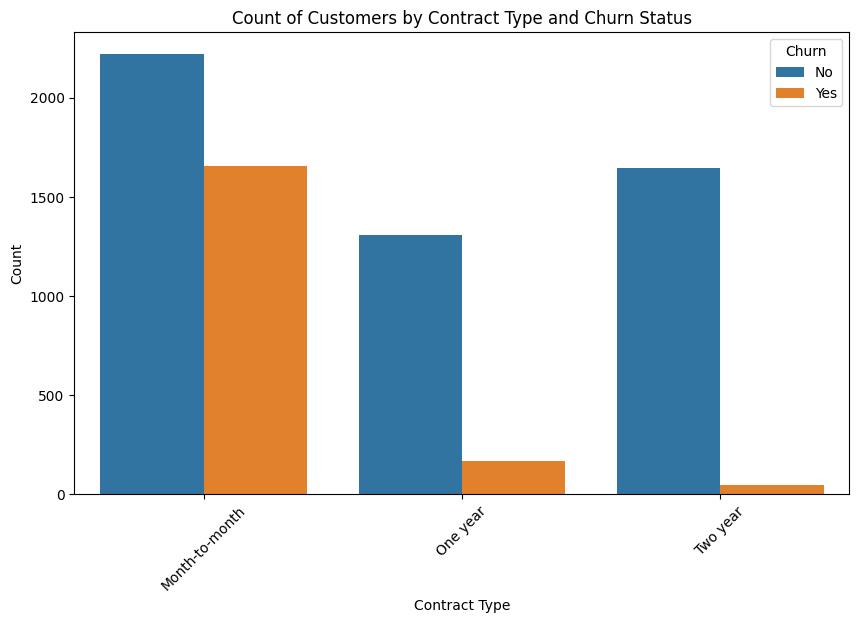

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.title('Count of Customers by Contract Type and Churn Status')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Churn', loc='upper right')
plt.show()


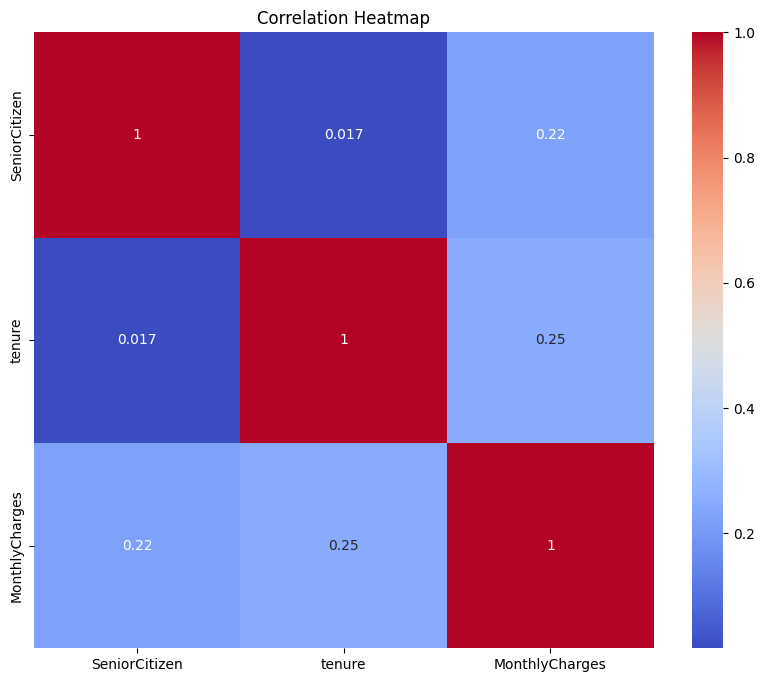

In [8]:
# Exclude non-numeric columns from correlation calculation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


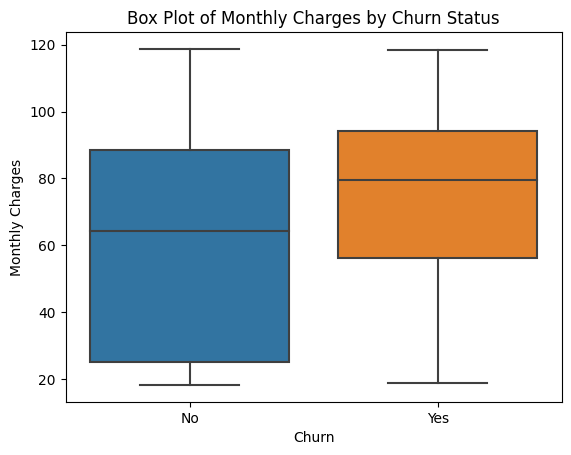

In [9]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.title('Box Plot of Monthly Charges by Churn Status')
plt.show()

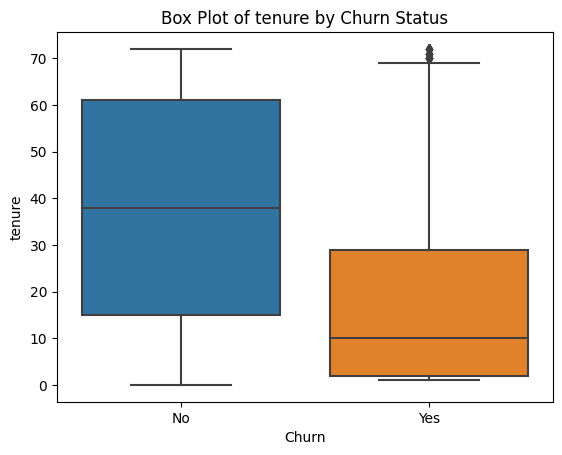

In [10]:
sns.boxplot(x='Churn', y='tenure', data=df)
plt.xlabel('Churn')
plt.ylabel('tenure')
plt.title('Box Plot of tenure by Churn Status')
plt.show()

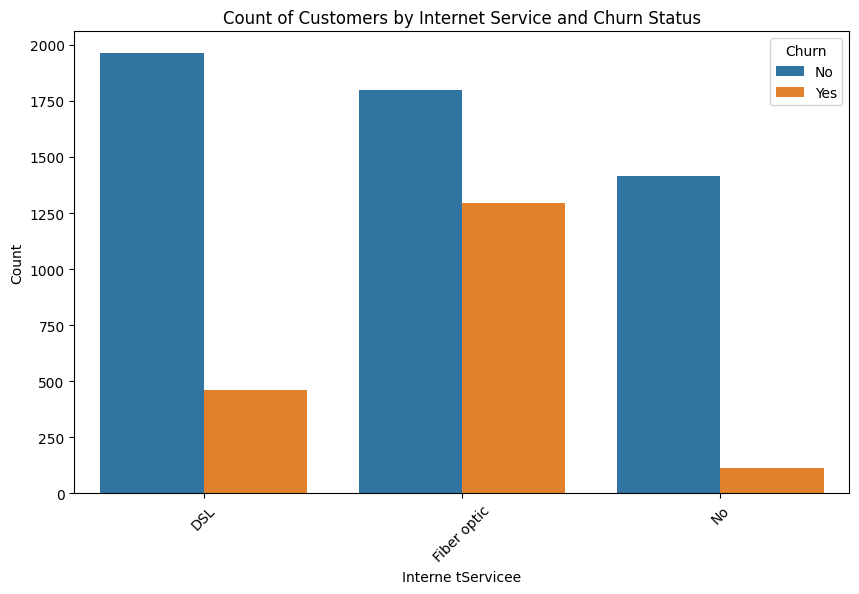

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.xlabel('Interne tServicee')
plt.ylabel('Count')
plt.title('Count of Customers by Internet Service and Churn Status')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Churn', loc='upper right')
plt.show()

In [12]:
# Group data by churn status and calculate summary statistics
summary_stats = df.groupby('Churn').agg({'tenure': ['mean', 'median', 'std', 'min', 'max'],
                                         'MonthlyCharges': ['mean', 'median', 'std', 'min', 'max']})

# Display summary statistics
print(summary_stats)

          tenure                           MonthlyCharges                     \
            mean median        std min max           mean  median        std   
Churn                                                                          
No     37.569965   38.0  24.113777   0  72      61.265124  64.425  31.092648   
Yes    17.979133   10.0  19.531123   1  72      74.441332  79.650  24.666053   

                      
         min     max  
Churn                 
No     18.25  118.75  
Yes    18.85  118.35  


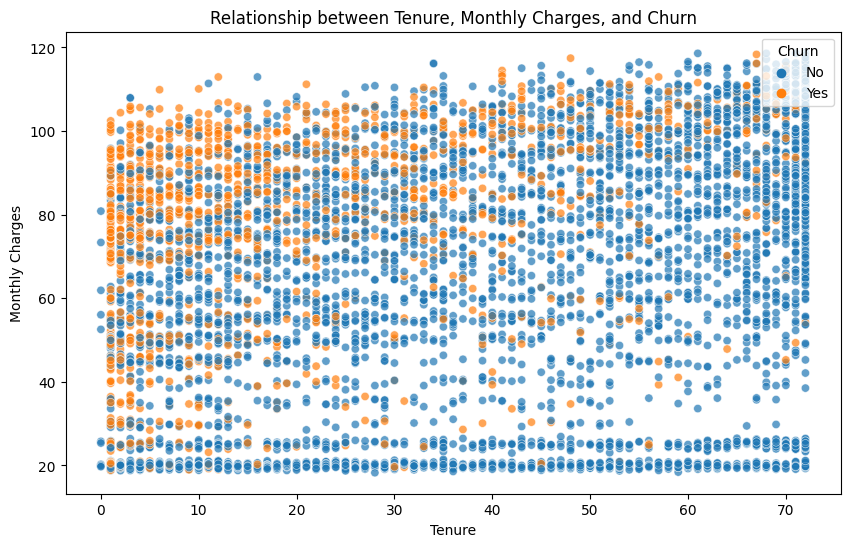

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data=df, alpha=0.7)
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.title('Relationship between Tenure, Monthly Charges, and Churn')
plt.legend(title='Churn', loc='upper right')
plt.show()

In [14]:
import plotly.express as px
fig = px.scatter(df, x='MonthlyCharges', y='tenure', color='Contract', hover_data=['Churn'])
fig.show()


/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


In [15]:
fig = px.bar(df, x='Contract', y='tenure', color='Churn', barmode='group')
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X = df[['tenure', 'MonthlyCharges']]
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7977288857345636

Classification Report:
              precision    recall  f1-score   support

          No       0.83      0.91      0.87      1036
         Yes       0.66      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.71      1409
weighted avg       0.79      0.80      0.79      1409



In [17]:
import pandas as pd
from scipy.stats import ttest_ind


df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')

df = df.dropna(subset=['MonthlyCharges'])

churned_customers = df[df['Churn'] == 'Yes']['MonthlyCharges']
non_churned_customers = df[df['Churn'] == 'No']['MonthlyCharges']

t_statistic, p_value = ttest_ind(churned_customers, non_churned_customers, equal_var=False)

print("Independent T-test Results:")
print("t-statistic:", t_statistic)
print("p-value:", p_value)

alpha = 0.05 
if p_value < alpha:
    print("Null hypothesis rejected: There is a significant difference in mean monthly charges.")
else:
    print("Fail to reject null hypothesis: No significant difference in mean monthly charges.")


Independent T-test Results:
t-statistic: 18.407526676414673
p-value: 8.59244933154705e-73
Null hypothesis rejected: There is a significant difference in mean monthly charges.
